# Imports

In [1]:
import pandas as pd
import numpy as np
import warnings

# Data

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


# Vizualization

In [10]:
import matplotlib.pyplot as plt
import missingno as msno

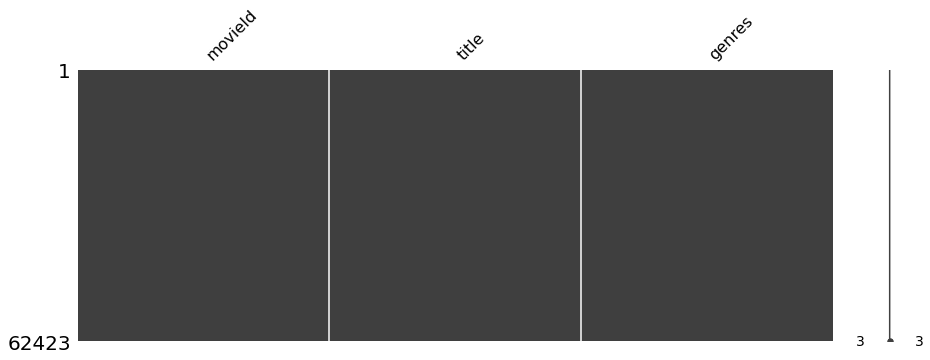

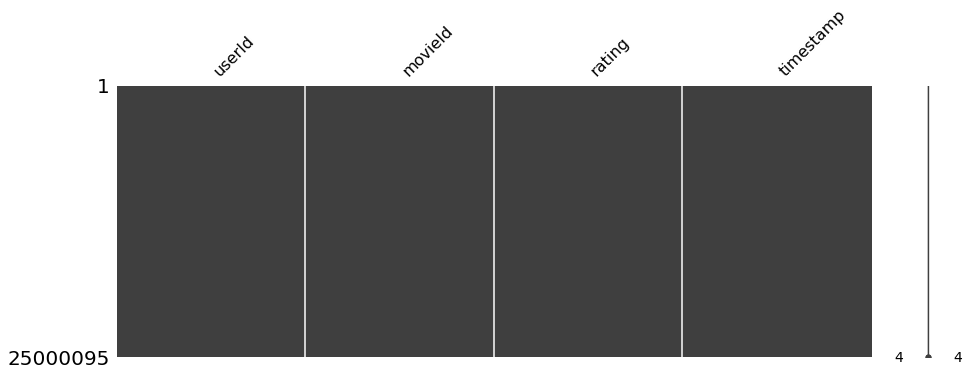

In [11]:
msno.matrix(movies, figsize=(15,5));
msno.matrix(ratings, figsize=(15,5));

# Prepare Data

In [3]:
new_movies = movies[['movieId', 'title']].copy()
new_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


### Get only users who have more than 1000 reviews

In [4]:
ratings['userId'].value_counts()

72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
12094        20
119539       20
156759       20
12084        20
36207        20
Name: userId, Length: 162541, dtype: int64

In [5]:
x = (ratings['userId'].value_counts() > 1000)
y = x[x].index

new_ratings = ratings.loc[ratings['userId'].isin(y)].copy()
new_ratings = new_ratings[['userId', 'movieId', 'rating']]
new_ratings

,userId,movieId,rating
23893,187,1,3.5
23894,187,2,3.5
23895,187,3,3.0
23896,187,13,4.5
23897,187,19,4.5
...,...,...,...
24996318,162516,194947,3.5
24996319,162516,194951,4.0
24996320,162516,195159,3.5
24996321,162516,196997,3.5


### Merge books with ratings

In [6]:
movies_ratings = new_movies.merge(new_ratings, on='movieId')
movies_ratings

,movieId,title,userId,rating
0,1,Toy Story (1995),187,3.5
1,1,Toy Story (1995),426,2.5
2,1,Toy Story (1995),541,5.0
3,1,Toy Story (1995),548,4.5
4,1,Toy Story (1995),626,4.5
...,...,...,...,...
4187352,209103,Tsar Ivan the Terrible (1991),13737,4.0
4187353,209121,Adrenalin: The BMW Touring Car Story (2014),53808,4.0
4187354,209135,Jane B. by Agnès V. (1988),154484,3.5
4187355,209147,The Carpet of Horror (1962),83426,3.5


### Get movies with more than 30 reviews

In [7]:
ratings_num = movies_ratings.groupby('title')['rating'].count().reset_index()
ratings_num.rename(columns={'rating': 'ratings_num'}, inplace=True)
ratings_num

,title,ratings_num
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",30
2,#1 Cheerleader Camp (2010),4
3,#Captured (2017),2
4,#Female Pleasure (2018),1
...,...,...
55467,…And the Fifth Horseman Is Fear (1965),2
55468,キサラギ (2007),1
55469,チェブラーシカ (2010),5
55470,貞子3D (2012),8


In [8]:
movies_ratings_ratings_num = movies_ratings.merge(ratings_num, on='title')
movies_ratings_ratings_num

,movieId,title,userId,rating,ratings_num
0,1,Toy Story (1995),187,3.5,2416
1,1,Toy Story (1995),426,2.5,2416
2,1,Toy Story (1995),541,5.0,2416
3,1,Toy Story (1995),548,4.5,2416
4,1,Toy Story (1995),626,4.5,2416
...,...,...,...,...,...
4187352,209103,Tsar Ivan the Terrible (1991),13737,4.0,1
4187353,209121,Adrenalin: The BMW Touring Car Story (2014),53808,4.0,1
4187354,209135,Jane B. by Agnès V. (1988),154484,3.5,1
4187355,209147,The Carpet of Horror (1962),83426,3.5,1


In [9]:
dataset = movies_ratings_ratings_num.loc[movies_ratings_ratings_num['ratings_num'] > 30].copy()
dataset.drop_duplicates(['userId','title'], inplace=True)
dataset

,movieId,title,userId,rating,ratings_num
0,1,Toy Story (1995),187,3.5,2416
1,1,Toy Story (1995),426,2.5,2416
2,1,Toy Story (1995),541,5.0,2416
3,1,Toy Story (1995),548,4.5,2416
4,1,Toy Story (1995),626,4.5,2416
...,...,...,...,...,...
4187150,207830,Terminator: Dark Fate (2019),132358,2.0,32
4187151,207830,Terminator: Dark Fate (2019),132596,3.0,32
4187152,207830,Terminator: Dark Fate (2019),143568,3.5,32
4187153,207830,Terminator: Dark Fate (2019),144301,3.5,32


# Clean Varibles

In [19]:
movies = []
ratings = []

new_movies = []
new_ratings = []

x = []
y = []

movies_ratings = []
movies_ratings_ratings_num = []


# Pivot Table

In [10]:
dataset_pivot = dataset.pivot_table(columns='userId', index='title', values='rating')
dataset_pivot.shape

(12402, 2670)

In [11]:
dataset_pivot

userId,187,426,541,548,626,653,757,803,846,847,...,161560,161586,161675,161826,161928,162047,162271,162495,162508,162516
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
'Salem's Lot (2004),NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx: Return of Xander Cage (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡Three Amigos! (1986),NaN,NaN,NaN,NaN,2.0,4.0,3.0,NaN,0.5,2.5,...,NaN,1.0,NaN,NaN,NaN,NaN,2.5,4.0,NaN,2.0


In [12]:
dataset_pivot.fillna(0, inplace=True)
dataset_pivot

userId,187,426,541,548,626,653,757,803,846,847,...,161560,161586,161675,161826,161928,162047,162271,162495,162508,162516
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Salem's Lot (2004),0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx: Return of Xander Cage (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx: State of the Union (2005),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
¡Three Amigos! (1986),0.0,0.0,0.0,0.0,2.0,4.0,3.0,0.0,0.5,2.5,...,0.0,1.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,2.0


# Sparce Matrix

In [13]:
from scipy.sparse import csr_matrix
final_dataset = csr_matrix(dataset_pivot)

# Model

In [14]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute', metric='euclidean')
model.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [15]:
model.fit(final_dataset)

NearestNeighbors(algorithm='brute', metric='euclidean')

# Predict

In [16]:
def print_result(suggestions):
  for target in suggestions[0]:
    print(dataset_pivot.index[target])

In [19]:
_, suggestions = model.kneighbors(dataset_pivot.loc['xXx: Return of Xander Cage (2017)'].values.reshape(1,-1))
print_result(suggestions)

xXx: Return of Xander Cage (2017)
The Transporter Refuelled (2015)
Once Upon a Time in Venice (2017)
Guardians (2016)
Escape Plan 2: Hades (2018)


In [25]:
_, suggestions = model.kneighbors(dataset_pivot.loc['Batman: The Killing Joke (2016)'].values.reshape(1,-1))
print_result(suggestions)

Batman: The Killing Joke (2016)
Batman: Bad Blood (2016)
Batman & Harley Quinn (2017)
Batman vs. Robin (2015)
Batman: Gotham by Gaslight (2018)


In [28]:
_, suggestions = model.kneighbors(dataset_pivot.loc['Avengers, The (2012)'].values.reshape(1,-1))
print_result(suggestions)

Avengers, The (2012)
Iron Man 2 (2010)
Dark Knight Rises, The (2012)
Thor (2011)
Captain America: The First Avenger (2011)


In [29]:
_, suggestions = model.kneighbors(dataset_pivot.loc['John Wick (2014)'].values.reshape(1,-1))
print_result(suggestions)

John Wick (2014)
John Wick: Chapter Two (2017)
Pacific Rim (2013)
Kingsman: The Secret Service (2015)
Edge of Tomorrow (2014)
